# Final Exam PHYS248/MATH248
**Saturday April 14th, 2018, 9am - 12pm (3 hrs)**

You are free to use all the course resources, as well as internet sources such as Python documentation web-pages and web search results. You must not have any communications by any means with people, other than the exam invigilators. 

If not explicitly stated otherwise, you are free to choose whichever library to use, including your own modules.  If you do use your own module, include it in your final exam directory.

Save your final exam (early and often!) in your Bitbucket repository, in `mp248/final/final.ipynb`.

Please include any other files or modules you will need to make your i-python notebook run in the `mp248/final` directory.

* * *

## Problem 1

### 1.1
In the `Quizzes_Assignments_Exams` directory you will find a file `sunspots.txt` which contains the observed number of sunspots for each month since 1749. Copy that file into the `final` directory of your repo and commit it along with the other file(s) to your repository. The file contains two columns with the month number and the sunspot number.

Read the data and make a graph as a function of time.  The arrays for month and number of sunspots are to be called `month` and `nr_sunsp`. Determine how many data point pairs are in the data set and print that number out embedded in a complete and formatted sentence.

Create down sampled data sets `month_sparse` and `nr_sunsp_sparse` by retaining only every $15^\mathrm{th}$ data pair. In other words, keep the first data pair, then skip 14, then keep the 15th, and so on.

Plot both the down-sampled data set and the original data set for month 900 to 1700.

In [3]:
%pylab nbagg

file = np.loadtxt("sunspots.txt")
sunspots = file.T

month = sunspots[0]
nr_sunsp = sunspots[1]

print("There are ", len(month)," data points.")

month_sparse = []
nr_sunsp_sparse = []
h = 0
while h < len(month):
    month_sparse.append(month[h])
    nr_sunsp_sparse.append(nr_sunsp[h])
    h += 15
    

Populating the interactive namespace from numpy and matplotlib
There are  3143  data points.


In [7]:
ifig = 1; close(ifig); figure(ifig)

plot(month[900:1700],nr_sunsp[900:1700], "go")
title("Data set for month 900 - 1700")
xlabel("Month")
ylabel("Number of Sunspots")

<IPython.core.display.Javascript object>

In [10]:
ifig = 2; close(ifig); figure(ifig)

#create arrays with the existing sparsed data in order to plot
monthplot = []
sunspplot = []

for i, mon in enumerate(month[900:1710]):
    if mon in month_sparse:
        monthplot.append(mon)
        sunspplot.append(nr_sunsp[i])
       
    
plot(monthplot, sunspplot, 'y')
title("Sparsed data set for month 900 - 1700")
xlabel("Month")
ylabel("Number of Sunspots")

<IPython.core.display.Javascript object>

### 1.2
Plot a histogram of the number of all sunspots with 10 bins. This shows the number times the measured number of sunspots is in each of the 10 sunspot number bins. Extract the data points of the distribution function and overplot with single dots. Make sure that these dots are properly centered for each bin.

<IPython.core.display.Javascript object>


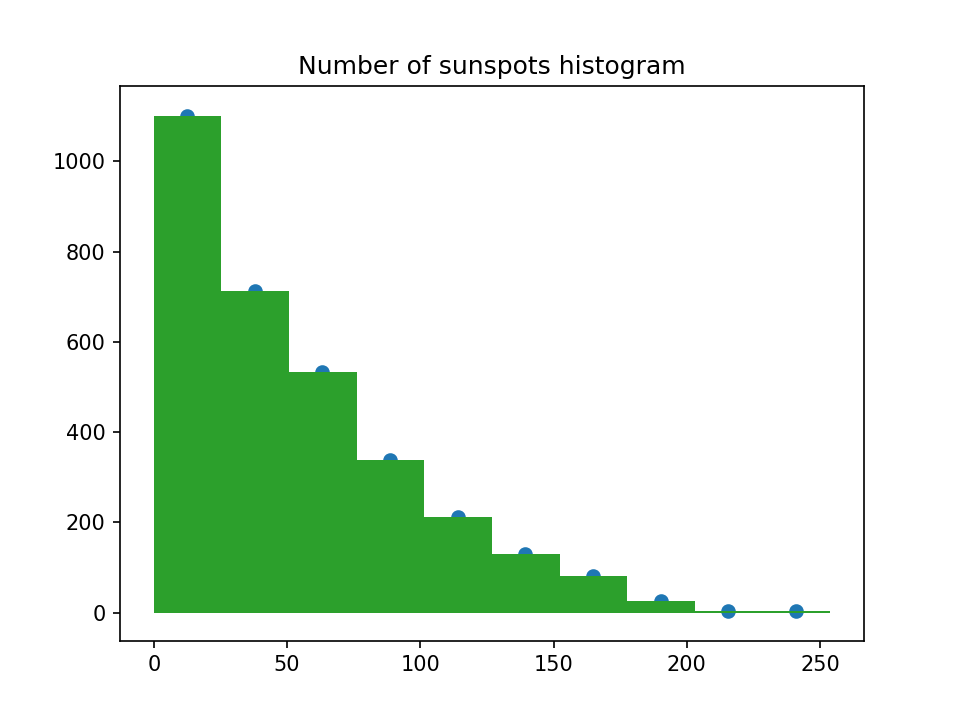

In [174]:
ifig = 3; close(ifig); figure(ifig)

hist(nr_sunsp, 10)
title("Number of sunspots histogram")
#x and y labels? I don't know what this is showing because the question wording is unclear


datpoints = hist(nr_sunsp, 10)[0]
pos = hist(nr_sunsp, 10)[1]
scatter(pos[:-1] + 25/2, datpoints)#centered them by shifting by half a box width

### 1.3
Fit the sunspot distribution function. Perform a least-square fit of an exponential with three parameters
$$
P_\mathrm{spots}(x) = a e^{bx} +c
$$
where $x=N_\mathrm{spots}$ is the number of sunspots measured.

Plot the distribution function data and fit together. Round the fit parameters appropriately and write your final fit formula in a Markdown cell. 

In [185]:
from scipy.optimize import curve_fit

def Pspots(x, a, b, c):
    return a*exp(b*x)+c


meanfit, varfit = curve_fit(Pspots, pos[:-1], datpoints) #this function gives me really weird fit values. I think something's 
#wrong but I don't know what.

In [186]:
meanfit 

array([ -1.53611426e-15,   1.00000000e+00,  -1.54192297e+50])

In [187]:
ifig = 4; close(ifig); figure(ifig)

scatter(pos[:-1] + 25/2, datpoints, label = "Data")
plot(pos[:-1] + 25/2, Pspots(datpoints, meanfit[0], meanfit[1],meanfit[2]), label="Fit")
legend(loc = "upper left")
xlabel("Month")
ylabel("Sunspots")

<IPython.core.display.Javascript object>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Using scipy gave me a fit of a = 1.53611426e-15,  b =  1.00000000e+00, and c =  -1.54192297e+50. I think this is incorrect but since its giving me a runtime warning I Don't know how to correct it.

## Problem 2

### 2.1
Write a function that takes as input a positive integer $k$, and uses Sympy to compute the degree $k$ Taylor polynomial for the function $y(x) = sin(x^2)$, centred at $x_0 = 0$, i.e. $T_k(x) = \sum_{i=0}^k\frac{d^i y}{dx^i}(x=0)  \frac{x^i}{i!}$.  Print the output using a Sympy *pprint* command, for $k=2,6,10,14,15$.

### 2.2
Write a function that takes as input a positive integer $k$, and uses Sympy to compute the degree $k$ polynomial *best fit* to $y(x) = sin(x^2)$ on the interval $[0,2\pi]$, using the least-squares technique. As in part 2.1, output your answers for $k=2,6,10,14,15$.

### 2.3
Write a function that takes as input a positive integer $k$.  Plot the function $y(x)=sin(x^2)$, together with the corresponding function from 2.1 and 2.2.  Include a legend.  For your $x$-bounds use the interval $[0, 2\pi]$, for the $y$-bounds use $[-1.2,1.2]$. Label your axis and give your plot an appropriate title (depending on $k$).  Include the plot for $k=10$ in your notebook. 

In [86]:
import sympy as sp

x = sp.Symbol('x')

def factorial(i):
    """calculates the factorial of a given number i and returns it"""
    if i == 0:
        return 1
    else:
        return i * factorial(i-1)
    
def Tk(k):
    """calculates the degree k Taylor polynomialfor the function y(x)=sin(x^2) and returns it"""
    ans = 0
    i = 0
    while i <= k:
        ans = ans + sp.diff(sp.sin(x**2), n=i)*x**i/factorial(i)
        i = i + 1
    return ans

In [95]:
k = [2,6,10,14,15]
#print out the calculation for each k value
for val in k:
    print("for k = ", val, " output is \n\n")
    sp.pprint(Tk(val))

for k =  2  output is 


 3    ⎛ 2⎞      2    ⎛ 2⎞          ⎛ 2⎞
x ⋅cos⎝x ⎠ + 2⋅x ⋅cos⎝x ⎠ + 2⋅x⋅cos⎝x ⎠
for k =  6  output is 


 7    ⎛ 2⎞    6    ⎛ 2⎞    5    ⎛ 2⎞    4    ⎛ 2⎞                             
x ⋅cos⎝x ⎠   x ⋅cos⎝x ⎠   x ⋅cos⎝x ⎠   x ⋅cos⎝x ⎠    3    ⎛ 2⎞      2    ⎛ 2⎞ 
────────── + ────────── + ────────── + ────────── + x ⋅cos⎝x ⎠ + 2⋅x ⋅cos⎝x ⎠ 
   360           60           12           3                                  

             
         ⎛ 2⎞
+ 2⋅x⋅cos⎝x ⎠
             
for k =  10  output is 


 11    ⎛ 2⎞    10    ⎛ 2⎞    9    ⎛ 2⎞    8    ⎛ 2⎞    7    ⎛ 2⎞    6    ⎛ 2⎞ 
x  ⋅cos⎝x ⎠   x  ⋅cos⎝x ⎠   x ⋅cos⎝x ⎠   x ⋅cos⎝x ⎠   x ⋅cos⎝x ⎠   x ⋅cos⎝x ⎠ 
─────────── + ─────────── + ────────── + ────────── + ────────── + ────────── 
  1814400        181440       20160         2520         360           60     

   5    ⎛ 2⎞    4    ⎛ 2⎞                                          
  x ⋅cos⎝x ⎠   x ⋅cos⎝x ⎠    3    ⎛ 2⎞      2    ⎛ 2⎞          ⎛ 2⎞
+ ────────── + ───

In [99]:
from sympy.mpmath import taylor #this is the function that should do what you're asking, I don't know why it says it doesnt exist
taylor(Tk, 0, 2)

ImportError: No module named 'sympy.mpmath'

In [215]:
def y(xs):
    ys = []
    for x in xs:
        ys.append(sp.sin(x**2))
    return ys


def Tkeval(x, k):
    """This function should evaluate T(k) for a range of x values, however its telling me its out of range. I don't think
    it should be.
    Should return a list of evaluations for different x values"""
    ans = 0
    i = 0
    ans = []
    for xv in x:
        while i <= k:
            if i == 0:
                ans.append(ans[i]+sp.diff(sp.sin(x**2), n=i)*x**i/factorial(i))
                i = i + 1
            else:
                ans.append(ans[i-1]+sp.diff(sp.sin(x**2), n=i)*x**i/factorial(i))
                i = i +1
    return ans

def plotfuncs(k):
    """this function is supposed to plot all three, but since only one is working, it only plots one."""
    theta = arange(0, 2*pi, 0.1)
    
    ifig = 5; close(ifig); figure(ifig)
    plot(theta, y(theta), label = "y(x)=sin(x^2)")
    xlabel("X")
    ylabel("Functions evaluated at x")
    legend(loc = "upper left")
    #plot(theta, Tkeval(theta, k), label = "Taylor polynomial of y(x)=sin(x^2)")
    

In [216]:
plotfuncs(10)


<IPython.core.display.Javascript object>

## Problem 3

The _Belousov-Zhabotinsky reaction_ is a chemcial oscillator, a cocktail of chemicals which, when heated, undergoes a series of reactions that cause the chemical concentrations in the mixture to oscillate between two extremes. The following equations describe the evolution of the two concentrations in this chemical system:
$$
\frac{dx}{dt} = 1-(b+1)x+ax^2y\\
\frac{dy}{dt} = bx -ax^2y
$$
where $x$ and $y$ represent concentrations of two chemicals and $a$ and  $b$ are positive constants. 

Solve these equations (numerically) for $a=1$, $b=3$ with initial conditions $x=y=0$ and plot the solution. 

In [130]:
def BelZha(a, b, x, y, dt, timeinterval):
    """This function takes as parameters the positive constants a and b, as well as initial values for x and y, and
    a time step (dt), as well as a time interval to integrate over.
    It returns as a list an array of the x values, y values, and times corresponding to each
    """
    xlist = []
    ylist = []
    tlist = []
    t = 0
    while t < timeinterval:
        deltax = (1 - (b+1)*x + a*x**2*y)*dt
        x = x + deltax
        deltay = (b*x - a*x**2*y)*dt
        y = y + deltay
        t = t + dt
        xlist.append(x)
        ylist.append(y)
        tlist.append(t)
    
    belzha = [xlist, ylist, tlist]
    return belzha

In [131]:
x = BelZha(1, 3, 0, 0, 0.1, 50)[0]
y = BelZha(1, 3, 0, 0, 0.1, 50)[1]
t = BelZha(1, 3, 0, 0, 0.1, 50)[2]

In [132]:
ifig = 6; close(ifig); figure(ifig)

#plot both x and y values on the same curve in terms of time
plot(t, x, color = 'orangered', label = 'x')
plot(t, y, color = 'khaki', label = 'y')
title("Solution to Belousov-Zhabotinsky reaction equations for time interval 50")
xlabel("Time")
ylabel('x and y')
legend(loc = 'upper left')

<IPython.core.display.Javascript object>

# Problem 4

In the `data` directory there is the text file `wdats.txt`. Copy this file into your `mp248/final` directory.   Each line of the file has a day of data for Victoria and Saskatoon.  The top line of the file explains the content of the remaining lines in the file.   In this problem we ask you to make a matplotlib interactive visualization of the data.

Use matplotlib `widgets` to control your interactive plot. Use a <a href="https://matplotlib.org/gallery/widgets/slider_demo.html">Slider</a> for the user to input the month as a number between 1 (January) and 12 (December).  Also have a <a href="https://matplotlib.org/gallery/widgets/radio_buttons.html">RadioButton</a> for the user to select between max, min and mean temperatures.

With the application running, when the user selects the month, and clicks on a radio button, the plot should update to show the temperatures for Victoria (horizontal axis) vs Saskatoon (vertical axis) for that month and with the convention chosen on the radio button.

This should be a properly interactive plot, that allows the user to dynamically change the month and radio button, with the plot automatically updating on every change.

If you find using the Slider or RadioButton feature difficult; rather than making an interactive plot, you could opt to make a callable function that takes two arguments: (1) the month as an integer between 1 and 12, and (2) a string 'Max', 'Min' or 'Mean'.  This function should then make the appropriate non-interactive Matplotlib plot, as described above.  Such an answer would receive (at best) a grade of 7/10.


In [217]:
import matplotlib.animation as animation
from matplotlib.widgets import Slider
from matplotlib.widgets import RadioButtons
from scipy.integrate import odeint
import datetime as dt

#note: there wasn't enough time to debug my other code as well as get to doing this part. I know how to arrange the code from 
#the assignment or the slider notes but I wasn't able to get to changing it to fit this context.

In [218]:
#getting all the data from the file
with open('wdats.txt') as f:
    content = f.readlines()
    print(content[0])

keys = content[0].translate({ord(c) : None for c in '\n'})
keys = keys.split(",")
mList = []
for i in range(1, len(content)):
    line = content[i].translate({ord(c) : None for c in '\n'})
    line = line.split(",")
    dat = {keys[j] : line[j] for j in range(len(line))}
    mList.append(dat)
    

for x in mList:
    x['Date'] = x['Date'].split('-')
    #print(x['Date'])
    x['Date'] = array(x['Date'])
mList

Date, Min (Vic), Mean (Vic), Max (Vic), Precip (Vic), Min (Sask), Mean (Sask), Max (Sask), Precip (Sask)



[{' Max (Sask)': ' -13.3',
  ' Max (Vic)': ' 6.1',
  ' Mean (Sask)': ' -15.6',
  ' Mean (Vic)': ' 2.8',
  ' Min (Sask)': ' -17.8',
  ' Min (Vic)': ' -0.6',
  ' Precip (Sask)': ' 0.5',
  ' Precip (Vic)': ' 0.0',
  'Date': array(['1970', '01', '01'],
        dtype='<U4')},
 {' Max (Sask)': ' -10.0',
  ' Max (Vic)': ' 5.6',
  ' Mean (Sask)': ' -12.5',
  ' Mean (Vic)': ' 3.1',
  ' Min (Sask)': ' -15.0',
  ' Min (Vic)': ' 0.6',
  ' Precip (Sask)': ' 1.0',
  ' Precip (Vic)': ' 0.5',
  'Date': array(['1970', '01', '02'],
        dtype='<U4')},
 {' Max (Sask)': ' -12.2',
  ' Max (Vic)': ' 5.6',
  ' Mean (Sask)': ' -16.1',
  ' Mean (Vic)': ' 2.3',
  ' Min (Sask)': ' -20.0',
  ' Min (Vic)': ' -1.1',
  ' Precip (Sask)': ' 1.5',
  ' Precip (Vic)': ' 0.3',
  'Date': array(['1970', '01', '03'],
        dtype='<U4')},
 {' Max (Sask)': ' -15.6',
  ' Max (Vic)': ' 3.9',
  ' Mean (Sask)': ' -20.9',
  ' Mean (Vic)': ' 0.3',
  ' Min (Sask)': ' -26.1',
  ' Min (Vic)': ' -3.3',
  ' Precip (Sask)': ' 0.0',
 

In [221]:
ifig = 7; close(ifig); figure(ifig)

for x in mList:
    
    fig, ax = plt.subplots()
    tempV, = ax.plot(x['Min (Vic)'], s0, color='red') #not sure how to access the temperatures if its in a dictionary
    plt.subplots_adjust(left=0.3)

    rax = plt.axes([0.05, 0.7, 0.15, 0.15], facecolor=axcolor)
    radio = RadioButtons(rax, ('Min', 'Mean', 'Max'))
                       
    month = Slider(axt, 'timestep', 0.01, 1, valinit=0.05)
                       
    #this makes the radio buttons for temperature
    def tempradio(label):
        temp.set_ydata(label)
        plt.draw()
    radio.on_clicked(tempradio)

    
    def update(dt):
        time = np.linspace(0.0, final_time, int(final_time/dt)) 
        
        
        month.set_xdata(time)
        month.set_ydata(th)

        
    timeval.on_changed(update)

    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyError: 'Min (Vic)'